In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")

Isolation Forest 테스트

In [2]:
df = pd.DataFrame({'salary':[4,1,4,5,3,6,2,5,6,2,5,7,1,8,12,33,4,7,6,7,8,55]})
model = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1), max_features=1.0, random_state= 1004)
model.fit(df[['salary']])
df['scores'] = model.decision_function(df[['salary']])
df['anomaly'] = model.predict(df[['salary']])
print(df)
# -1 이 이상치, 1이 정상.

    salary    scores  anomaly
0        4  0.194431        1
1        1  0.097424        1
2        4  0.194431        1
3        5  0.226778        1
4        3  0.141024        1
5        6  0.222908        1
6        2  0.151436        1
7        5  0.226778        1
8        6  0.222908        1
9        2  0.151436        1
10       5  0.226778        1
11       7  0.206867        1
12       1  0.097424        1
13       8  0.179884        1
14      12 -0.010825       -1
15      33 -0.117029       -1
16       4  0.194431        1
17       7  0.206867        1
18       6  0.222908        1
19       7  0.206867        1
20       8  0.179884        1
21      55 -0.191967       -1


본론

In [4]:
data=pd.read_csv('creditcard.csv')

data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

정상 / 비정상 수치 막대그래프 비교

OSError: 'seaborn-paper' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

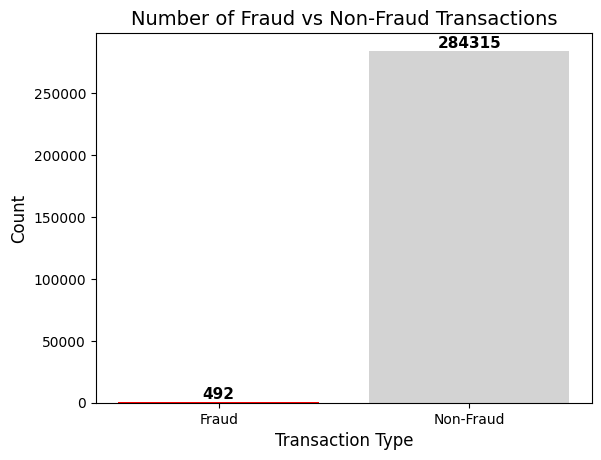

In [7]:
num_nonfraud = np.sum(data['Class'] == 0)
num_fraud = np.sum(data['Class'] == 1)

plt.bar(['Fraud', 'Non-Fraud'], [num_fraud, num_nonfraud], color=['red', 'lightgrey'])
plt.title('Number of Fraud vs Non-Fraud Transactions', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

for i, value in enumerate([num_fraud, num_nonfraud]):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=11, fontweight='bold')
    
plt.style.use('seaborn-paper')

plt.show()

In [9]:
data['Hour'] = data["Time"].apply(lambda x : divmod(x, 3600)[0])
X = data.drop(['Time', 'Class'], axis=1)
Y = data.Class

# 모델 훈련
iforest = IsolationForest()
data['label'] = iforest.fit_predict(X)
data['scores'] = iforest.decision_function(X)

#TopN 정확도 평가
n = 1000
df = data.sort_values(by='scores', ascending=True)
df = df.head(n)
rate = df[df['Class'] == 1].shape[0] / n
print('Top{}의 정확도는: {}'.format(n,rate))

Top1000의 정확도는: 0.162


In [10]:
iforest.get_params()

{'bootstrap': False,
 'contamination': 'auto',
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

정확도에 대한 n_estimator 의 영향

Top1000의 정확도는: 0.139
Top1000의 정확도는: 0.181
Top1000의 정확도는: 0.196
Top1000의 정확도는: 0.194
Top1000의 정확도는: 0.174
Top1000의 정확도는: 0.183
Top1000의 정확도는: 0.198
Top1000의 정확도는: 0.193
Top1000의 정확도는: 0.189
Top1000의 정확도는: 0.198
Top1000의 정확도는: 0.192
Top1000의 정확도는: 0.186
Top1000의 정확도는: 0.183
Top1000의 정확도는: 0.196
Top1000의 정확도는: 0.206
Top1000의 정확도는: 0.21
Top1000의 정확도는: 0.212
Top1000의 정확도는: 0.218
Top1000의 정확도는: 0.224
Top1000의 정확도는: 0.225
Top1000의 정확도는: 0.224
Top1000의 정확도는: 0.228
Top1000의 정확도는: 0.227
Top1000의 정확도는: 0.223
Top1000의 정확도는: 0.223
Top1000의 정확도는: 0.221
Top1000의 정확도는: 0.214
Top1000의 정확도는: 0.212
Top1000의 정확도는: 0.212
Top1000의 정확도는: 0.208
Top1000의 정확도는: 0.208
Top1000의 정확도는: 0.213
Top1000의 정확도는: 0.213
Top1000의 정확도는: 0.208
Top1000의 정확도는: 0.208
Top1000의 정확도는: 0.207
Top1000의 정확도는: 0.207
Top1000의 정확도는: 0.205
Top1000의 정확도는: 0.208
Top1000의 정확도는: 0.208
Top1000의 정확도는: 0.208
Top1000의 정확도는: 0.2
Top1000의 정확도는: 0.197
Top1000의 정확도는: 0.196
Top1000의 정확도는: 0.196
Top1000의 정확도는: 0.195
Top1000의 정확도는: 0.196
Top1000의 정확도는: 0

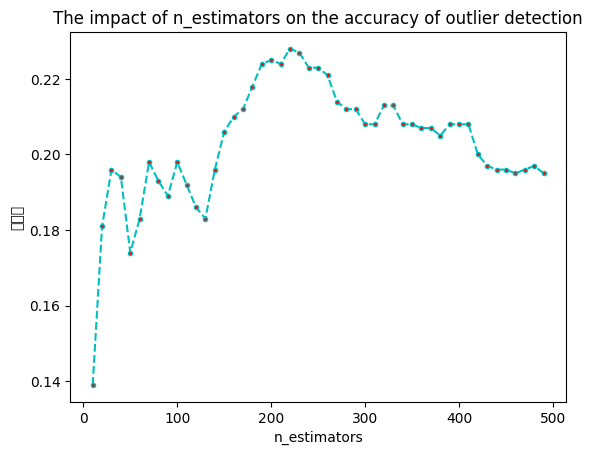

In [13]:
import warnings
import matplotlib.pyplot as plt

n_est = list(range(10, 500 ,10))
rates = []

for i in n_est:
    # 모델 훈련
    iforest = IsolationForest(n_estimators=i, max_samples=256,
                              contamination=0.02, max_features=5, random_state=1)
    data['label'] = iforest.fit_predict(X)
    data['scores'] = iforest.decision_function(X)
    #TopN 정확도 평가
    n = 1000
    df = data.sort_values(by='scores', ascending=True)
    df = df.head(n)
    rate = df[df['Class'] == 1].shape[0] / n
    print('Top{}의 정확도는: {}'.format(n,rate))
    rates.append(rate)
    
# 그래프 그리기
plt.style.use('seaborn-v0_8-pastel')
plt.plot(n_est, rates, linestyle='--', marker='.', color='c', markerfacecolor='red')
plt.xlabel('n_estimators')
plt.ylabel('정확도')
plt.title('The impact of n_estimators on the accuracy of outlier detection')

plt.show()

정확도에 대한 max_features의 영향

In [15]:
features = list(range(1, X.shape[1]+1))
rates = []
for i in features:
    #모델 훈련
    iforest = IsolationForest(n_estimators=100, max_samples=256,
                              contamination=0.02, max_features=i, random_state=1)
    data['label'] = iforest.fit_predict(X)
    data['scores'] = iforest.decision_function(X)
    #TopN 정확도 평가
    n = 1000
    df = data.sort_values(by='scores', ascending=True)
    df = df.head(n)
    rate = df[df['Class'] == 1].shape[0] / n
    print('Top{}의 정확도는: {}'.format(n,rate))
    rates.append(rate)
    
print(features)
print(rates)

Top1000의 정확도는: 0.224
Top1000의 정확도는: 0.202
Top1000의 정확도는: 0.211
Top1000의 정확도는: 0.22
Top1000의 정확도는: 0.198
Top1000의 정확도는: 0.198
Top1000의 정확도는: 0.184
Top1000의 정확도는: 0.208
Top1000의 정확도는: 0.182
Top1000의 정확도는: 0.163
Top1000의 정확도는: 0.172
Top1000의 정확도는: 0.197
Top1000의 정확도는: 0.186
Top1000의 정확도는: 0.177
Top1000의 정확도는: 0.203
Top1000의 정확도는: 0.179
Top1000의 정확도는: 0.176
Top1000의 정확도는: 0.165
Top1000의 정확도는: 0.138
Top1000의 정확도는: 0.167
Top1000의 정확도는: 0.181
Top1000의 정확도는: 0.155
Top1000의 정확도는: 0.152
Top1000의 정확도는: 0.173
Top1000의 정확도는: 0.192
Top1000의 정확도는: 0.19
Top1000의 정확도는: 0.152
Top1000의 정확도는: 0.156
Top1000의 정확도는: 0.172
Top1000의 정확도는: 0.178
Top1000의 정확도는: 0.202
Top1000의 정확도는: 0.177
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[0.224, 0.202, 0.211, 0.22, 0.198, 0.198, 0.184, 0.208, 0.182, 0.163, 0.172, 0.197, 0.186, 0.177, 0.203, 0.179, 0.176, 0.165, 0.138, 0.167, 0.181, 0.155, 0.152, 0.173, 0.192, 0.19, 0.152, 0.156, 0.172, 0.178, 0

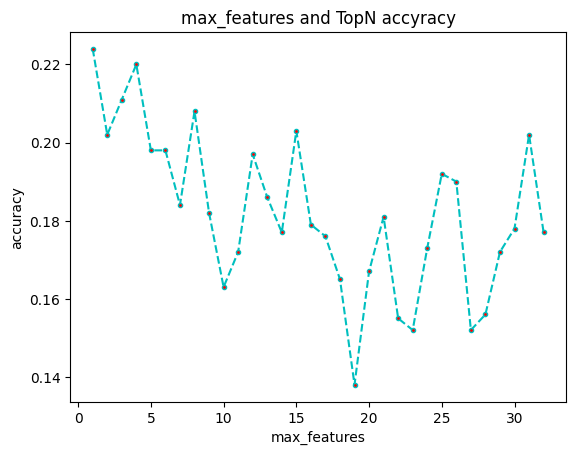

In [16]:
import matplotlib.pyplot as plt
plt.plot(features, rates, linestyle='--', marker='.', color='c', markerfacecolor='red')
plt.title('max_features and TopN accyracy')
plt.xlabel('max_features')
plt.ylabel('accuracy')
plt.show()

In [17]:
features = list(range(1, X.shape[1]+1))
rates = []

for i in features:
    #모델 훈련
    iforest = IsolationForest(n_estimators=100, max_samples=1200,
                              contamination=0.02, max_features=i, random_state=1)
    data['label'] = iforest.fit_predict(X)
    data['scores'] = iforest.decision_function(X)
    #TopN 정확도 평가
    n = 1000
    df = data.sort_values(by='scores', ascending=True)
    df = df.head(n)
    rate = df[df['Class'] == 1].shape[0] / n
    print('Top{}의 정확도는: {}'.format(n,rate))
    rates.append(rate)
    
print(features)
print(rates)

Top1000의 정확도는: 0.244
Top1000의 정확도는: 0.207
Top1000의 정확도는: 0.203
Top1000의 정확도는: 0.232
Top1000의 정확도는: 0.2
Top1000의 정확도는: 0.209
Top1000의 정확도는: 0.205
Top1000의 정확도는: 0.205
Top1000의 정확도는: 0.179
Top1000의 정확도는: 0.211
Top1000의 정확도는: 0.202
Top1000의 정확도는: 0.192
Top1000의 정확도는: 0.181
Top1000의 정확도는: 0.201
Top1000의 정확도는: 0.18
Top1000의 정확도는: 0.175
Top1000의 정확도는: 0.201
Top1000의 정확도는: 0.206
Top1000의 정확도는: 0.204
Top1000의 정확도는: 0.224
Top1000의 정확도는: 0.224
Top1000의 정확도는: 0.203
Top1000의 정확도는: 0.185
Top1000의 정확도는: 0.205
Top1000의 정확도는: 0.2
Top1000의 정확도는: 0.215
Top1000의 정확도는: 0.156
Top1000의 정확도는: 0.19
Top1000의 정확도는: 0.201
Top1000의 정확도는: 0.202
Top1000의 정확도는: 0.19
Top1000의 정확도는: 0.205
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
[0.244, 0.207, 0.203, 0.232, 0.2, 0.209, 0.205, 0.205, 0.179, 0.211, 0.202, 0.192, 0.181, 0.201, 0.18, 0.175, 0.201, 0.206, 0.204, 0.224, 0.224, 0.203, 0.185, 0.205, 0.2, 0.215, 0.156, 0.19, 0.201, 0.202, 0.19, 0.20

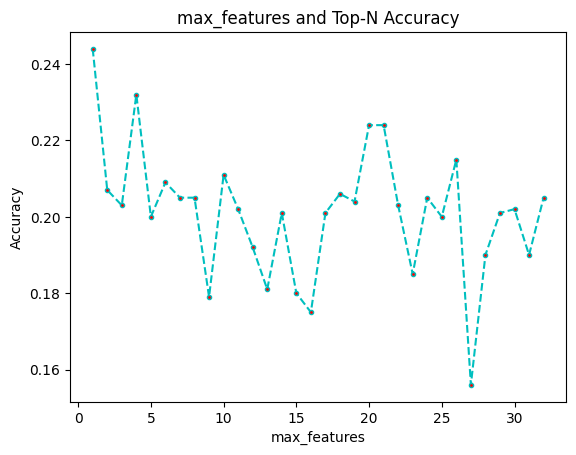

In [18]:
import matplotlib.pyplot as plt
plt.plot(features, rates, linestyle='--', marker='.', color='c', markerfacecolor='red')
plt.title('max_features and Top-N Accuracy')
plt.xlabel('max_features')
plt.ylabel('Accuracy')
plt.show()

In [19]:
samples = list(range(16,2066,16))
rates = []
for i in samples:
    # 모델 훈련
    iforest = IsolationForest(n_estimators=100, max_samples= i, contamination=0.02, max_features=5, random_state=1)
    # fit_predict
    data['label'] = iforest.fit_predict(X)
    data['scores'] = iforest.decision_function(X)
    #TopN 정확도 평가
    n = 1000
    df = data.sort_values(by='scores', ascending=True)
    df = df.head(n)
    rate = df[df['Class'] == 1].shape[0] / n
    print('Top{}의 정확도는: {}'.format(n,rate))
    rates.append(rate)

Top1000의 정확도는: 0.142
Top1000의 정확도는: 0.152
Top1000의 정확도는: 0.141
Top1000의 정확도는: 0.159
Top1000의 정확도는: 0.165
Top1000의 정확도는: 0.156
Top1000의 정확도는: 0.167
Top1000의 정확도는: 0.163
Top1000의 정확도는: 0.166
Top1000의 정확도는: 0.172
Top1000의 정확도는: 0.179
Top1000의 정확도는: 0.177
Top1000의 정확도는: 0.181
Top1000의 정확도는: 0.17
Top1000의 정확도는: 0.182
Top1000의 정확도는: 0.198
Top1000의 정확도는: 0.194
Top1000의 정확도는: 0.191
Top1000의 정확도는: 0.174
Top1000의 정확도는: 0.185
Top1000의 정확도는: 0.176
Top1000의 정확도는: 0.182
Top1000의 정확도는: 0.184
Top1000의 정확도는: 0.183
Top1000의 정확도는: 0.193
Top1000의 정확도는: 0.189
Top1000의 정확도는: 0.203
Top1000의 정확도는: 0.204
Top1000의 정확도는: 0.189
Top1000의 정확도는: 0.186
Top1000의 정확도는: 0.198
Top1000의 정확도는: 0.188
Top1000의 정확도는: 0.183
Top1000의 정확도는: 0.187
Top1000의 정확도는: 0.194
Top1000의 정확도는: 0.179
Top1000의 정확도는: 0.185
Top1000의 정확도는: 0.192
Top1000의 정확도는: 0.192
Top1000의 정확도는: 0.201
Top1000의 정확도는: 0.191
Top1000의 정확도는: 0.186
Top1000의 정확도는: 0.195
Top1000의 정확도는: 0.182
Top1000의 정확도는: 0.185
Top1000의 정확도는: 0.188
Top1000의 정확도는: 0.198
Top1000의 정확도는:

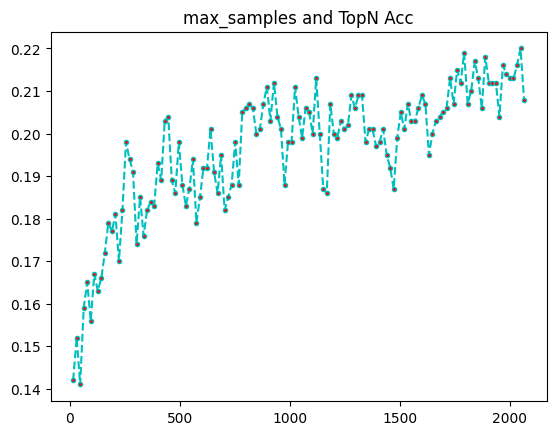

In [20]:
import matplotlib.pyplot as plt
plt.plot(samples, rates, linestyle='--', marker='.', color='c', markerfacecolor='red')
plt.title('max_samples and TopN Acc')
plt.show()

최종 하이퍼파라미터 선정 모델

In [22]:
# 모델 훈련
iforest = IsolationForest(n_estimators=250, max_samples = 125000, contamination=0.05, max_features=5, random_state=1)
data['label'] = iforest.fit_predict(X)
data['scores'] = iforest.decision_function(X)
# TopN 정확도 평가
n = 1000
df = data.sort_values(by='scores', ascending=True)
df = df.head(n)
rate = df[df['Class'] == 1].shape[0] / n
print('Top{}의 정확도는:{}'.format(n,rate))
df.to_csv('df.csv', header=True,index=False)

Top1000의 정확도는:0.242
